# Part A: Model Code (60 pts)




In [1]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

1. Write a function to calculate and return the Minkowski distance with optional argument p. defaulting to ‘p=2’ (Euclidean) of two vectors where a vector represents a data point.[6 pts]

In [2]:
import numpy as np

def Distance(v1, v2, p=2):
    v1 = np.array(v1)
    v2 = np.array(v2)

    # Calculate the absolute differences raised to the power of p
    absolute_diff = np.abs(v1 - v2) ** p

    # Sum the absolute differences raised to the power of p, then take the p-th root
    distance = np.sum(absolute_diff) ** (1/p)

    return distance

# Example usage:
v1_ex = [1, 2, 3]
v2_ex = [4, 5, 6]
euclidean_distance = Distance(v1_ex, v2_ex)   # Default p=2 for Euclidean distance
print("Euclidean Distance:", euclidean_distance)

manhattan_distance = Distance(v1_ex, v2_ex, p=1)  # Setting p=1 for Manhattan distance
print("Manhattan Distance:", manhattan_distance)

chebyshev_distance = Distance(v1_ex, v2_ex, p=np.inf)  # Setting p=inf for Chebyshev distance
print("Chebyshev distance:", chebyshev_distance)


Euclidean Distance: 5.196152422706632
Manhattan Distance: 9.0
Chebyshev distance: 1.0


2. Write a function to calculate and return the accuracy of two vectors. [4 pts]

In [3]:
def accuracy(y_true, y_pred): #y_true: The true labels/ y_pred: The predicted labels.

    # Ensure the lengths of the vectors are the same
    if len(y_true) != len(y_pred):
        raise ValueError("Lengths of the input vectors do not match.")

     # Calculate the accuracy
    acc = sum(true == pred for true, pred in zip(y_true, y_pred)) / len(y_true)
    return acc

# Example usage of the accuracy function
y_true_example = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
y_pred_example = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]

# Calculate accuracy
accuracy_score = accuracy(y_true_example, y_pred_example)
print("Accuracy:", accuracy_score)

Accuracy: 0.7


3. Write three functions to compute: precision, recall and F1 score. [6 pts]

In [4]:
# Calculate precision, recall, and F1 score
def Measures(y_true, y_pred):
    tn, fp, fn, tp = 0, 0, 0, 0
    for idx in range(len(y_true)):
        if y_true[idx] == 1 and y_pred[idx] == 1:
            tp += 1
        elif y_true[idx] == 0 and y_pred[idx] == 0:
            tn += 1
        elif y_true[idx] == 1 and y_pred[idx] == 0:
            fn += 1
        else:
            fp += 1
    return tn, fp, fn, tp
# Define functions to compute precision, recall, and F1 score
def precision(y_true, y_pred):#precision = tp / (tp + fp)
    tp = sum(1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 1)
    fp = sum(1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 1)
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall(y_true, y_pred):#recall = tp / (tp + fn)
    tp = sum(1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 1)
    fn = sum(1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 0)
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score(y_true, y_pred): #F1 score is the harmonic mean of precision and recall.
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

# Example usage with example data
y_true_example = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # Actual labels
y_pred_example = [1, 1, 0, 0, 1, 0, 0, 1, 1, 1]  # Predicted labels

# Compute precision, recall, and F1 score
precision_score1 = precision(y_true_example, y_pred_example)
recall_score1 = recall(y_true_example, y_pred_example)
f1_score_value1 = f1_score(y_true_example, y_pred_example)

# Print the results
print("Precision:", precision_score1)
print("Recall:", recall_score1)
print("F1 Score:", f1_score_value1)


Precision: 0.5
Recall: 0.6
F1 Score: 0.5454545454545454


4. Write a function to compute the confusion matrix of two vectors. [4 pts]

In [5]:
def ConfusionMatrix(y_true, y_pred):
    # Get the measures from the true and predicted labels
    tn, fp, fn, tp = Measures(y_true, y_pred)

    # Construct the confusion matrix
    return np.array([[tp, fn], [fp, tn]])


# Example usage
y_true_example = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # Actual labels
y_pred_example = [1, 1, 0, 0, 1, 0, 0, 1, 1, 1]  # Predicted labels

conf_matrix = ConfusionMatrix(y_true_example, y_pred_example)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3 2]
 [3 2]]


5. Write a function to generate the Receiver Operating Characteristic (ROC) curve.

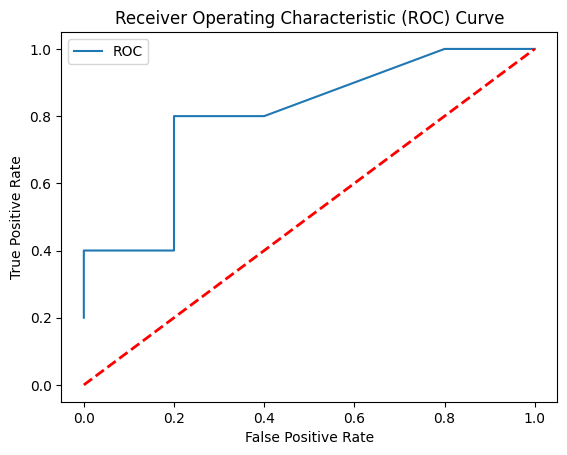

In [6]:
def roc_curve(y_true, y_prob):
    tpr = []
    fpr = []
    num_positives = sum(y_true)
    num_negatives = len(y_true) - num_positives

    for threshold in np.arange(0, 1, 0.1):
        y_pred = np.array(y_prob >= threshold, dtype='int')
        tn, fp, fn, tp = Measures(y_true, y_pred)

        # Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
        if tp == 0 and fn == 0:
            continue  # Skip this iteration if TPR calculation is not possible
        if fp == 0 and tn == 0:
            continue  # Skip this iteration if FPR calculation is not possible

        tpr.append(tp / num_positives)  # Calculate True Positive Rate
        fpr.append(fp / num_negatives)  # Calculate False Positive Rate

    # Plot ROC curve using tpr and fpr lists
    plt.plot(fpr, tpr, label="ROC")
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Example
y_true_example = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]  # True label
y_prob_example = [0.1, 0.3, 0.6, 0.2, 0.8, 0.4, 0.7, 0.9, 0.5, 0.3]  # Probability

# Plot ROC curve
roc_curve(y_true_example, y_prob_example)


6. Write a function to compute area under curve (AUC) for the ROC curve. [5 pts]

In [7]:
def auc_roc(fpr, tpr): # Compute the Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve.
    # Ensure fpr and tpr are numpy arrays
    fpr = np.array(fpr)
    tpr = np.array(tpr)

    # Compute the area under the ROC curve using the trapezoidal rule
    auc_value = np.trapz(tpr, fpr)

    return auc_value

# Example usage of auc_roc function
fpr_example = np.array([0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]) # fpr (array-like): False Positive Rates.
tpr_example = np.array([0, 0.2, 0.4, 0.6, 0.8, 0.9, 1]) # tpr (array-like): True Positive Rates.

auc = auc_roc(fpr_example, tpr_example)
print("Area under the ROC curve (AUC):", auc)


Area under the ROC curve (AUC): 0.575


7. Write a function to generate the precision-recall curve. [5 pts]            
X: Recall   = TP/TP+FN                                                         
Y: Precision= TP/TP+FP      .                                                 
The x-axis represents Recall, and the y-axis represents Precision. The area under the curve (AUC-PR) is calculated below these axes.                                                  

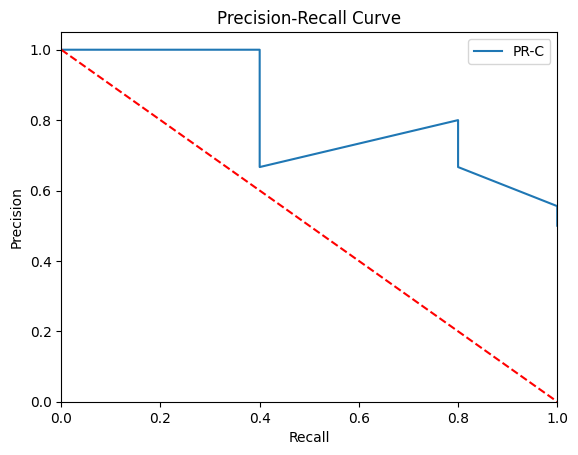

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_precision_recall_curve(y_true, y_prob):
    prcs = []
    rcls = []
    thresholds = np.arange(0, 1, 0.1)

    for threshold in thresholds:
        y_pred = np.array(y_prob >= threshold, dtype='int')
        tn, fp, fn, tp = Measures(y_true, y_pred)

        # Calculate precision, recall, and F1 score
        precision_val = precision(y_true, y_pred)
        recall_val = recall(y_true, y_pred)
        f1_val = f1_score(y_true, y_pred)

        prcs.append(precision_val)  # prcs :add precision_val
        rcls.append(recall_val)

    prcs.append(1)  # Append 1 to precision for full recall
    rcls.append(0)  # Append 0 to recall for zero precision

    # Plot Precision-Recall curve
    plt.plot(rcls, prcs, label="PR-C")
    plt.plot([0, 1], [1, 0], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# Example data
y_true_example = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]  # Actual labels
y_prob_example = [0.1, 0.3, 0.6, 0.2, 0.8, 0.4, 0.7, 0.9, 0.5, 0.3]  # Predicted probabilities

# Plot Precision-Recall curve
plot_precision_recall_curve(y_true_example, y_prob_example)


8. Implement a KNN_Classifier model class. It should have the following three methods.[20 pts]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# Caculate Minkowski distance between two vectors with default p=2
class KNN_classifier: # KNN Classifier class
  def __init__(self, n_neighbors=5, weights='uniform', p=2): #method 1 _init_ # Initialize KNN classifier with specified parameters
    self.n_neighbors = n_neighbors
    self.weights = weights
    self.p = p

  def fit(self, X_train, y_train): # Fit the KNN classifier to the training data
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_predict, threshold=0.5):  #method  # Predict the class labels for the input data
    y_prob = self.predict_proba(X_predict)
    n = y_prob.shape[0]
    y_pred = np.zeros((n,1))
    for idx in range(n):
      if y_prob[idx] > threshold:
        y_pred[idx] = 1
      else:
        y_pred[idx] = 0
    return y_pred

  def predict_proba(self, X_predict): #method # Predict class probabilities for the input data
    n = self.X_train.shape[0]
    m = self.X_train.shape[1]
    z = X_predict.shape[0]
    y_prob = np.zeros((z,1))
    for i in range(z):
      distances = []
      for j in range(n):  # Calculate Minkowski distance between input data point and training data points
        distances.append(Distance(self.X_train[j], X_predict[i].T))

      distancesSorted = np.argsort(distances)
      topK = [self.y_train[idx].item() for idx in distancesSorted[:self.n_neighbors]]
      if self.weights == "uniform":
        topKDict = Counter(topK)
        y_prob[i] = topKDict[1]/self.n_neighbors
      elif self.weights == "idw":
        inverseDistances = [(1+1e-5)/(distances[idx]+1e-5) for idx in distancesSorted[:self.n_neighbors]]
        idSum = sum(inverseDistances)
        inverseDistanceWeights = [id/idSum for id in inverseDistances]
        for idx, x in enumerate(topK):
          if x == 1:
            y_prob[i] += inverseDistanceWeights[idx]

    return y_prob

  def get_params(self):        #method  # Get parameters of the KNN classifier
    return {"n_neighbors":self.n_neighbors,
            "weights":self.weights,
            "p":self.p}

  def set_params(self, **params): #method  # Set parameters of the KNN classifier
    validParams = self.get_params()
    validParams.update(params)

    self.n_neighbors = validParams['n_neighbors']
    self.weights = validParams['weights']
    self.p = validParams['p']
    return self


9. Write a function named “partition” to split your data into training and test sets. The function should take 4 arguments: [ 5 pts]

In [10]:
# Function to split data into training and test sets
import numpy as np

def partition(featureM, targetVec, t, shuffle=True): #featureM: Input features matrix. targetVec: Target labels vector t: Ratio of the dataset to include in the test set.
    if shuffle == True: #shuffle: Whether to shuffle the data before splitting. Default is True.
        np.random.seed(42)
        shuffledIndices = np.random.permutation(len(featureM))
        testSize = int(len(featureM) * t)
        testIndices = shuffledIndices[:testSize]
        trainIndices = shuffledIndices[testSize:]
        return featureM[trainIndices, :], featureM[testIndices,:], targetVec[trainIndices], targetVec[testIndices]


#Part B: Data Processing, Feature Selection, and Initial Estimation (40 pts)

10. Read in the winequality-white.csv file as a Pandas data frame.

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
import pandas as pd
# Read the CSV file with the correct delimiter
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ ML/winequality-white.csv", delimiter=';')
df.shape

(4898, 12)

11. The target will be the “quality” column which represents the rating of wine and ranges from 3 to 8.
You will need to convert it into a two-category variable consisting of “good” (quality> 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality wine) and 1s (representing “good” quality wine). [2 pts]


In [13]:
target = df['quality'].apply(lambda x: 1 if x > 5 else 0)
#1: GOOD, 0: Bad
target

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int64

12. Provide a table with univariate statistics of your data (mean, standard deviation, and quartiles, min, max, missing count, number of unique values). [4 pts]

In [14]:
# Calculate the number of unique values for each column
unique_vals = [len(df[col].unique()) for col in list(df)]

In [15]:
# Calculate univariate statistics
stats = {
    "mean": df.mean(axis=0),
    "std": df.std(),
    "quantile_25": df.quantile(0.25),
    "q_50": df.quantile(0.5),
    "q_75": df.quantile(0.75),
    "min": df.min(),
    "max": df.max(),
    "missing_count": df.isnull().sum(),
    "unique_values": unique_vals # Or I can use describe.() function
}

In [16]:
# Create a DataFrame from the calculated statistics
stats_df = pd.DataFrame(stats)
# Display the DataFrame
stats_df

,mean,std,quantile_25,q_50,q_75,min,max,missing_count,unique_values
fixed acidity,6.854788,0.843868,6.300000,6.80000,7.3000,3.80000,14.20000,0,68
volatile acidity,0.278241,0.100795,0.210000,0.26000,0.3200,0.08000,1.10000,0,125
citric acid,0.334192,0.121020,0.270000,0.32000,0.3900,0.00000,1.66000,0,87
residual sugar,6.391415,5.072058,1.700000,5.20000,9.9000,0.60000,65.80000,0,310
chlorides,0.045772,0.021848,0.036000,0.04300,0.0500,0.00900,0.34600,0,160
free sulfur dioxide,35.308085,17.007137,23.000000,34.00000,46.0000,2.00000,289.00000,0,132
total sulfur dioxide,138.360657,42.498065,108.000000,134.00000,167.0000,9.00000,440.00000,0,251
density,0.994027,0.002991,0.991723,0.99374,0.9961,0.98711,1.03898,0,890
pH,3.188267,0.151001,3.090000,3.18000,3.2800,2.72000,3.82000,0,103
sulphates,0.489847,0.114126,0.410000,0.47000,0.5500,0.22000,1.08000,0,79


13. Generate pair plots using the seaborn package to help identify redundant features. For any redundant features(?), report, drop, and explain your logic (w/ markdown). [4 pts]


In [17]:
import seaborn as sns
sns.pairplot(df, hue = 'quality') # I want to compare all files with quality
plt.show()

Output hidden; open in https://colab.research.google.com to view.

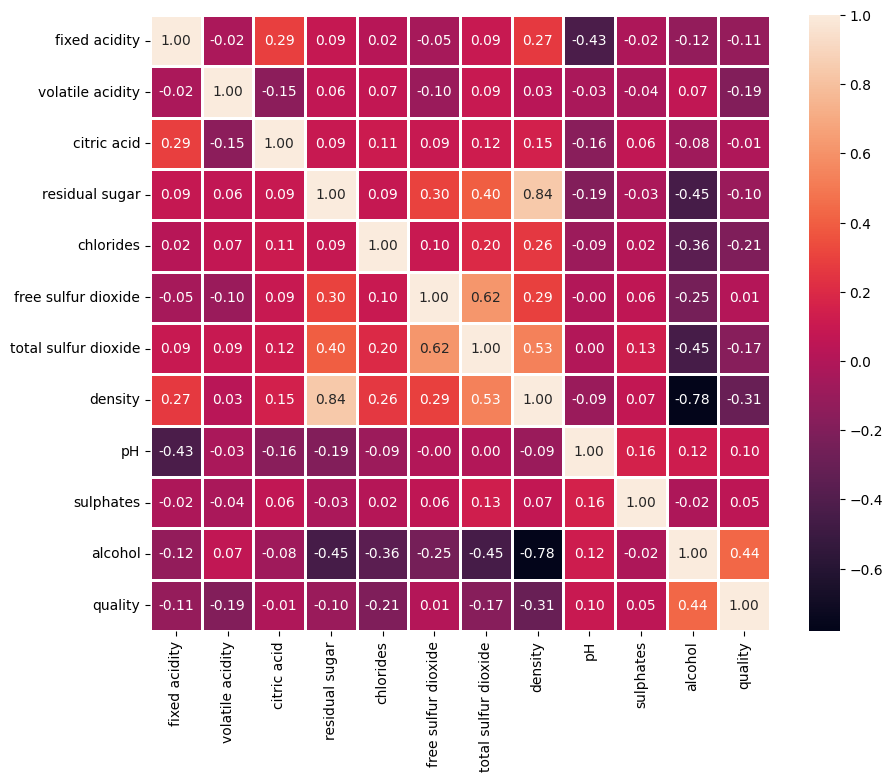

In [18]:
# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2) #correlation with Residual sugar and density=0.84
plt.show()


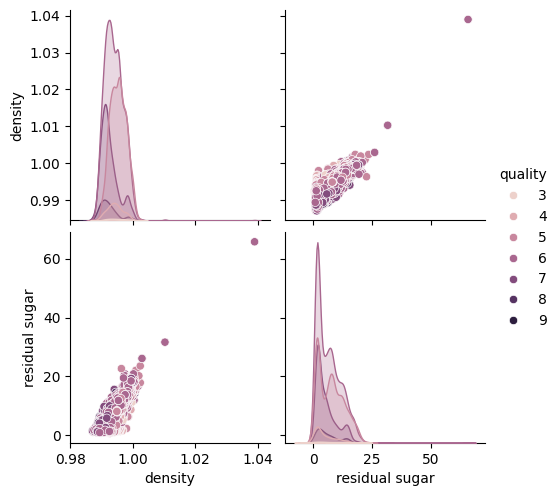

In [19]:
sns.pairplot(df[['density', 'residual sugar', 'quality']], hue = 'quality') #positive correlation
plt.show()

In [20]:
# Calculate correlation between density and residual sugar
correlation = df['density'].corr(df['residual sugar'])

# Print correlation
print(f'Correlation between density and residual sugar: {correlation:.3f}')

# Check if correlation is high
if correlation > 0.8:
    # Drop density feature
    df.drop('density', axis=1, inplace=True)
    print("Since there is a high correlation(83.9%), we drop the 'density' feature.")
    print("Updated data shape:", df.shape)
else:
    print("No need to drop any feature.")


Correlation between density and residual sugar: 0.839
Since there is a high correlation(83.9%), we drop the 'density' feature.
Updated data shape: (4898, 11)


14. Use your “partition” function to split the data into 80% train and 20% test. [5 pts]

In [21]:
# Function to split data into training and test sets
import numpy as np

def partition(featureM, targetVec, t, shuffle=True): #Shuffle
    if shuffle == True:
        np.random.seed(42)
        # Get integer indices
        shuffledIndices = np.random.permutation(len(featureM))
        testSize = int(len(featureM) * t)
        testIndices = shuffledIndices[:testSize]
        trainIndices = shuffledIndices[testSize:]
        # Use integer indices to select rows from featureM and targetVec
        return featureM.iloc[trainIndices, :], featureM.iloc[testIndices, :], targetVec.iloc[trainIndices], targetVec.iloc[testIndices]

# Usage
X_train, X_test, y_train, y_test = partition(df.iloc[:, :-1], target, 0.2)


15. Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and using Euclidean distance. [15 pts]



*   a. Use accuracy and F1 score to compare your predictions to the expected labels.
*   b. Now standardize each feature of your training set (subtract mean and divide by standard deviation) and apply trained standardization to the test set. Use the mean and standard deviation values for each feature in the training set to scale the test data (you can use sklearn.preprocessing.StandardScaler)
*   c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1 score with the expected labels.
*   d. Compare the two accuracy values and the F1 scores; and decide whether you should use standardized data or unscaled data for the remainder of the assignment.
*   e. Perform a similar test for inverse distance weighting in the KNN_Classifier model and determine whether or not to use it. [5 pts]




In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [23]:
# a. Train KNN_Classifier model and evaluate with accuracy and F1 score
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)

# Evaluate with accuracy and F1 score
accuracy_original = accuracy_score(y_test, y_pred)
f1_original = f1_score(y_test, y_pred)

# Evaluate with accuracy and F1 score
accuracy_original = accuracy_score(y_test, y_pred)
f1_original = f1_score(y_test, y_pred)

print("Naive Run:")
print("Accuracy:", round(accuracy_original, 3))
print("F1 Score:", round(f1_original, 3))

Naive Run:
Accuracy: 0.711
F1 Score: 0.794


In [24]:
#b. Standardization:
scaler = StandardScaler()

# Standardize the features
scaler.fit(X_train)
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [25]:
# c. Re-initialize KNN classifier
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model on standardized data
model.fit(X_train_std, y_train)

# Predict on the standardized test set
y_pred_std = model.predict(X_test_std)

# Evaluate with accuracy and F1 score
accuracy_std = accuracy_score(y_test, y_pred_std)
f1_std = f1_score(y_test, y_pred_std)

print("Standardized Run:")
print("Accuracy with Standardization:", round(accuracy_std, 3))
print("F1 Score with Standardization:", round(f1_std, 3))

Standardized Run:
Accuracy with Standardization: 0.762
F1 Score with Standardization: 0.827


d. The performance metrics (accuracy and F1 score) showed significant improvement when using standardized data compared to unscaled data. Accuracy increased from 0.71 to 0.76, and the F1 score increased from 0.79 to 0.83. Based on these results, it's advisable to use standardized data for the remainder of the assignment since it leads to better performance.

In [26]:
# Train KNN_Classifier model with inverse distance weighting
model_idw = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
model_idw.fit(X_train_std, y_train)

# Predict using the model with inverse distance weighting
y_pred_idw = model_idw.predict(X_test_std)

# Calculate accuracy and F1 score for the model with inverse distance weighting
accuracy_idw = accuracy_score(y_test, y_pred_idw)
f1_idw = f1_score(y_test, y_pred_idw)

# Round accuracy and F1 score to two decimal places
accuracy_idw_rounded = round(accuracy_idw, 3)
f1_idw_rounded = round(f1_idw, 3)

print("Accuracy with IDW:", accuracy_idw_rounded)
print("F1 Score with IDW:", f1_idw_rounded)


Accuracy with IDW: 0.826
F1 Score with IDW: 0.872


The F1 Score obtained with inverse distance weighting (IDW) in the KNN Classifier model is 0.87, and the accuracy is 0.83. Based on these results, it appears that using IDW improves both F1 score and accuracy compared to the model without IDW. Therefore, it is advisable to use IDW for this classification task.







16. Repeat #15 a-d, but using a logistic regression with ‘elasticnet’ or ‘l2’ penalty (feel free to
use sklearn.linear_model.LogisticRegression) [10 pts]

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the features
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize Logistic Regression model with 'elasticnet' penalty
LR_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, l1_ratio=0.5)

# Train the model
LR_elasticnet.fit(X_train_std, y_train)

# Predict
y_pred_LR_elasticnet = LR_elasticnet.predict(X_test_std)

# Evaluate with accuracy and F1 score
accuracy_LR_elasticnet = accuracy_score(y_test, y_pred_LR_elasticnet)
f1_LR_elasticnet = f1_score(y_test, y_pred_LR_elasticnet)

# Initialize Logistic Regression model with 'l2' penalty
LR_l2 = LogisticRegression(penalty='l2', max_iter=1000)

# Train the model
LR_l2.fit(X_train_std, y_train)

# Predict
y_pred_LR_l2 = LR_l2.predict(X_test_std)

# Evaluate with accuracy and F1 score
accuracy_LR_l2 = accuracy_score(y_test, y_pred_LR_l2)
f1_LR_l2 = f1_score(y_test, y_pred_LR_l2)

# Round accuracy and F1 score to two decimal places
accuracy_LR_elasticnet_rounded = round(accuracy_LR_elasticnet, 3)
f1_LR_elasticnet_rounded = round(f1_LR_elasticnet, 3)
accuracy_LR_l2_rounded = round(accuracy_LR_l2, 3)
f1_LR_l2_rounded = round(f1_LR_l2, 3)

# Print results
print("Logistic Regression with elasticnet penalty:")
print("Accuracy:", accuracy_LR_elasticnet_rounded)
print("F1 Score:", f1_LR_elasticnet_rounded)

print("\nLogistic Regression with L2 penalty:")
print("Accuracy:", accuracy_LR_l2_rounded)
print("F1 Score:", f1_LR_l2_rounded)


Logistic Regression with elasticnet penalty:
Accuracy: 0.743
F1 Score: 0.819

Logistic Regression with L2 penalty:
Accuracy: 0.744
F1 Score: 0.82


# Part C: Model Evaluation and Results Summary (100 pts)

17) Evaluation of an estimator performance via cross-validation: Implement the S-fold cross validation function. [15 pts]


a. sFold(folds, data, labels, model, model_args, error_fuction)
*   i. folds is an integer number of folds.
*   ii. data is a numpy array with rows representing data samples and columns
representing features.
*   iii. labels is a numpy array with labels corresponding to each row of training_features.
*   iv. model is an object with the fit and predict methods.
*   v. model args is a dictionary of arguments to pass to the classification algorithm. If you are unfamiliar, look up using the ** operator to unpack dictionaries as arguments
*   vi. error_function :Returns error value between predicted and true labels. For example, mean squared error (mse) function could be used as error_function.



In [28]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import numpy as np

def sFold(folds, data, labels, model, model_args, error_function):
    num_samples = len(data)
    fold_size = num_samples // folds
    errors = []
    expected_labels = []
    predicted_labels = []

    for i in range(folds):
        start_idx = i * fold_size
        end_idx = min((i + 1) * fold_size, num_samples)

        data_train = np.concatenate([data[:start_idx], data[end_idx:]], axis=0)
        labels_train = np.concatenate([labels[:start_idx], labels[end_idx:]], axis=0)
        data_test = data[start_idx:end_idx]
        labels_test = labels[start_idx:end_idx]

        model.set_params(**model_args)
        model.fit(data_train, labels_train)
        labels_pred = model.predict(data_test)

        if error_function == 'mse':
            mse = np.square(np.subtract(labels_test, labels_pred)).mean()
            errors.append(mse)
        elif error_function == 'f1':
            f1 = f1_score(labels_test.ravel(), labels_pred)
            errors.append(f1)

        # Calculate other performance metrics
        precision = precision_score(labels_test.ravel(), labels_pred)
        recall = recall_score(labels_test.ravel(), labels_pred)
        confusion = confusion_matrix(labels_test.ravel(), labels_pred)
        accuracy = accuracy_score(labels_test.ravel(), labels_pred)
        generalization_error = 1 - accuracy
        expected_labels.append(labels_test)
        predicted_labels.append(labels_pred)

        # Print performance measures for each fold
        print(f"Performance Measures for Fold {i + 1}:")
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print("Confusion Matrix:")
        print(confusion)
        print("Accuracy:", accuracy)
        print("Generalization Error:", generalization_error)
        print("-----------------------------------")

    return expected_labels, predicted_labels, errors


18) Only using the training portion of your data, use your sfold function to evaluate the
performance of your model over each combination of k and distance metrics from the following
sets: [10 pts]
*   i. k=[1,5,9,11]
       b. distance = [Euclidean, Manhattan]
*   ii. weights = [uniform, distance]
*   iii. From the returned tuple store as a row in a pandas DataFrame with headers: Experiment name, k, distance, weights, Average F1
*   iv. Determine the best model based on the overall performance. For the error_function of the S-fold function argument use the F1 score function from Part A.

In [29]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Define the combinations of parameters
ks = [1, 5, 9, 11]
distances = ['euclidean', 'manhattan']
weights = ['uniform', 'distance']

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Experiment name', 'k', 'distance', 'weights', 'Average F1'])

# Iterate over each combination of parameters
for k in ks:
    for distance in distances:
        for weight in weights:
            # Define the experiment name
            experiment_name = f"k={k}, distance={distance}, weights={weight}"

            # Create a KNN classifier
            knn_classifier = KNeighborsClassifier()

            # Perform s-fold cross-validation
            expected_labels, predicted_labels, errors = sFold(5, X_train_std, y_train, knn_classifier, {'n_neighbors': k, 'weights': weight, 'metric': distance}, error_function='f1')

            # Calculate the average F1 score
            avg_f1_score = np.mean(errors)

            # Store the results in the DataFrame
            results_df = results_df.append({'Experiment name': experiment_name,
                                            'k': k,
                                            'distance': distance,
                                            'weights': weight,
                                            'Average F1': avg_f1_score}, ignore_index=True)

# Determine the best model based on the overall performance
best_model = results_df.loc[results_df['Average F1'].idxmax()]


Performance Measures for Fold 1:
Precision: 0.84251968503937
Recall: 0.8060263653483992
F1 Score: 0.8238691049085659
Confusion Matrix:
[[172  80]
 [103 428]]
Accuracy: 0.7662835249042146
Generalization Error: 0.23371647509578541
-----------------------------------
Performance Measures for Fold 2:
Precision: 0.8468634686346863
Recall: 0.8676748582230623
F1 Score: 0.8571428571428572
Confusion Matrix:
[[171  83]
 [ 70 459]]
Accuracy: 0.8045977011494253
Generalization Error: 0.1954022988505747
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8195211786372008
Recall: 0.8460076045627376
F1 Score: 0.832553788587465
Confusion Matrix:
[[159  98]
 [ 81 445]]
Accuracy: 0.7713920817369093
Generalization Error: 0.22860791826309068
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.8064516129032258
Recall: 0.8620689655172413
F1 Score: 0.8333333333333334
Confusion Matrix:
[[188 102]
 [ 68 425]]
Accuracy: 0.7828863346104725
Generalization

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 4:
Precision: 0.8064516129032258
Recall: 0.8620689655172413
F1 Score: 0.8333333333333334
Confusion Matrix:
[[188 102]
 [ 68 425]]
Accuracy: 0.7828863346104725
Generalization Error: 0.21711366538952748
-----------------------------------
Performance Measures for Fold 5:
Precision: 0.8531746031746031
Recall: 0.8317214700193424
F1 Score: 0.8423114593535749
Confusion Matrix:
[[192  74]
 [ 87 430]]
Accuracy: 0.7943805874840357
Generalization Error: 0.20561941251596427
-----------------------------------


<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 1:
Precision: 0.8428290766208252
Recall: 0.807909604519774
F1 Score: 0.8250000000000001
Confusion Matrix:
[[172  80]
 [102 429]]
Accuracy: 0.7675606641123882
Generalization Error: 0.2324393358876118
-----------------------------------
Performance Measures for Fold 2:
Precision: 0.8484288354898336
Recall: 0.8676748582230623
F1 Score: 0.8579439252336448
Confusion Matrix:
[[172  82]
 [ 70 459]]
Accuracy: 0.8058748403575989
Generalization Error: 0.19412515964240107
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8352272727272727
Recall: 0.8384030418250951
F1 Score: 0.8368121442125237
Confusion Matrix:
[[170  87]
 [ 85 441]]
Accuracy: 0.7803320561941252
Generalization Error: 0.21966794380587484
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.8049242424242424
Recall: 0.8620689655172413
F1 Score: 0.8325171400587659
Confusion Matrix:
[[187 103]
 [ 68 425]]
Accuracy: 0.7816091954022989
Generalizati

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 3:
Precision: 0.8352272727272727
Recall: 0.8384030418250951
F1 Score: 0.8368121442125237
Confusion Matrix:
[[170  87]
 [ 85 441]]
Accuracy: 0.7803320561941252
Generalization Error: 0.21966794380587484
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.8049242424242424
Recall: 0.8620689655172413
F1 Score: 0.8325171400587659
Confusion Matrix:
[[187 103]
 [ 68 425]]
Accuracy: 0.7816091954022989
Generalization Error: 0.2183908045977011
-----------------------------------
Performance Measures for Fold 5:
Precision: 0.8629032258064516
Recall: 0.8278529980657641
F1 Score: 0.8450148075024678
Confusion Matrix:
[[198  68]
 [ 89 428]]
Accuracy: 0.7994891443167306
Generalization Error: 0.20051085568326943
-----------------------------------


<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 1:
Precision: 0.8178506375227687
Recall: 0.8455743879472694
F1 Score: 0.8314814814814815
Confusion Matrix:
[[152 100]
 [ 82 449]]
Accuracy: 0.7675606641123882
Generalization Error: 0.2324393358876118
-----------------------------------
Performance Measures for Fold 2:
Precision: 0.81195079086116
Recall: 0.8733459357277883
F1 Score: 0.8415300546448088
Confusion Matrix:
[[147 107]
 [ 67 462]]
Accuracy: 0.7777777777777778
Generalization Error: 0.2222222222222222
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8076225045372051
Recall: 0.8460076045627376
F1 Score: 0.8263695450324977
Confusion Matrix:
[[151 106]
 [ 81 445]]
Accuracy: 0.7611749680715197
Generalization Error: 0.23882503192848026
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.7833333333333333
Recall: 0.8580121703853956
F1 Score: 0.8189738625363021
Confusion Matrix:
[[173 117]
 [ 70 423]]
Accuracy: 0.7611749680715197
Generalization

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 2:
Precision: 0.8475177304964538
Recall: 0.9035916824196597
F1 Score: 0.8746569075937786
Confusion Matrix:
[[168  86]
 [ 51 478]]
Accuracy: 0.8250319284802043
Generalization Error: 0.17496807151979565
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8288288288288288
Recall: 0.8745247148288974
F1 Score: 0.851063829787234
Confusion Matrix:
[[162  95]
 [ 66 460]]
Accuracy: 0.7943805874840357
Generalization Error: 0.20561941251596427
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.8081180811808119
Recall: 0.8884381338742393
F1 Score: 0.8463768115942029
Confusion Matrix:
[[186 104]
 [ 55 438]]
Accuracy: 0.7969348659003831
Generalization Error: 0.2030651340996169
-----------------------------------
Performance Measures for Fold 5:
Precision: 0.8378870673952641
Recall: 0.8897485493230174
F1 Score: 0.8630393996247654
Confusion Matrix:
[[177  89]
 [ 57 460]]
Accuracy: 0.8135376756066411
Generalizati

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 1:
Precision: 0.8321167883211679
Recall: 0.8587570621468926
F1 Score: 0.8452270620945319
Confusion Matrix:
[[160  92]
 [ 75 456]]
Accuracy: 0.7867177522349936
Generalization Error: 0.21328224776500637
-----------------------------------
Performance Measures for Fold 2:
Precision: 0.8315217391304348
Recall: 0.8676748582230623
F1 Score: 0.849213691026827
Confusion Matrix:
[[161  93]
 [ 70 459]]
Accuracy: 0.7918263090676884
Generalization Error: 0.20817369093231164
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8171846435100548
Recall: 0.8498098859315589
F1 Score: 0.8331780055917987
Confusion Matrix:
[[157 100]
 [ 79 447]]
Accuracy: 0.7713920817369093
Generalization Error: 0.22860791826309068
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.7725631768953068
Recall: 0.8681541582150102
F1 Score: 0.8175740210124165
Confusion Matrix:
[[164 126]
 [ 65 428]]
Accuracy: 0.756066411238825
Generalizati

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 3:
Precision: 0.8360655737704918
Recall: 0.8726235741444867
F1 Score: 0.853953488372093
Confusion Matrix:
[[167  90]
 [ 67 459]]
Accuracy: 0.7994891443167306
Generalization Error: 0.20051085568326943
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.8028933092224232
Recall: 0.9006085192697769
F1 Score: 0.8489483747609943
Confusion Matrix:
[[181 109]
 [ 49 444]]
Accuracy: 0.7982120051085568
Generalization Error: 0.20178799489144317
-----------------------------------
Performance Measures for Fold 5:
Precision: 0.8484288354898336
Recall: 0.8878143133462283
F1 Score: 0.8676748582230623
Confusion Matrix:
[[184  82]
 [ 58 459]]
Accuracy: 0.8212005108556832
Generalization Error: 0.17879948914431676
-----------------------------------


<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 1:
Precision: 0.8173598553345389
Recall: 0.8512241054613936
F1 Score: 0.8339483394833948
Confusion Matrix:
[[151 101]
 [ 79 452]]
Accuracy: 0.7701149425287356
Generalization Error: 0.22988505747126442
-----------------------------------
Performance Measures for Fold 2:
Precision: 0.7996545768566494
Recall: 0.8752362948960303
F1 Score: 0.8357400722021661
Confusion Matrix:
[[138 116]
 [ 66 463]]
Accuracy: 0.7675606641123882
Generalization Error: 0.2324393358876118
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8142857142857143
Recall: 0.8669201520912547
F1 Score: 0.8397790055248618
Confusion Matrix:
[[153 104]
 [ 70 456]]
Accuracy: 0.7777777777777778
Generalization Error: 0.2222222222222222
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.7656529516994633
Recall: 0.8681541582150102
F1 Score: 0.8136882129277567
Confusion Matrix:
[[159 131]
 [ 65 428]]
Accuracy: 0.7496807151979565
Generalizati

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 2:
Precision: 0.8417391304347827
Recall: 0.9149338374291115
F1 Score: 0.8768115942028986
Confusion Matrix:
[[163  91]
 [ 45 484]]
Accuracy: 0.8263090676883781
Generalization Error: 0.17369093231162192
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8384201077199281
Recall: 0.8878326996197718
F1 Score: 0.8624192059095105
Confusion Matrix:
[[167  90]
 [ 59 467]]
Accuracy: 0.80970625798212
Generalization Error: 0.19029374201787996
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.8032490974729242
Recall: 0.9026369168356998
F1 Score: 0.8500477554918815
Confusion Matrix:
[[181 109]
 [ 48 445]]
Accuracy: 0.7994891443167306
Generalization Error: 0.20051085568326943
-----------------------------------
Performance Measures for Fold 5:
Precision: 0.8432432432432433
Recall: 0.9052224371373307
F1 Score: 0.873134328358209
Confusion Matrix:
[[179  87]
 [ 49 468]]
Accuracy: 0.8263090676883781
Generalizatio

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 2:
Precision: 0.8075601374570447
Recall: 0.888468809073724
F1 Score: 0.8460846084608462
Confusion Matrix:
[[142 112]
 [ 59 470]]
Accuracy: 0.7816091954022989
Generalization Error: 0.2183908045977011
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8241758241758241
Recall: 0.8555133079847909
F1 Score: 0.83955223880597
Confusion Matrix:
[[161  96]
 [ 76 450]]
Accuracy: 0.7803320561941252
Generalization Error: 0.21966794380587484
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.7660714285714286
Recall: 0.8701825557809331
F1 Score: 0.8148148148148148
Confusion Matrix:
[[159 131]
 [ 64 429]]
Accuracy: 0.7509578544061303
Generalization Error: 0.24904214559386972
-----------------------------------
Performance Measures for Fold 5:
Precision: 0.8100358422939068
Recall: 0.874274661508704
F1 Score: 0.8409302325581395
Confusion Matrix:
[[160 106]
 [ 65 452]]
Accuracy: 0.7816091954022989
Generalization 

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 1:
Precision: 0.8618181818181818
Recall: 0.8926553672316384
F1 Score: 0.8769657724329325
Confusion Matrix:
[[176  76]
 [ 57 474]]
Accuracy: 0.8301404853128991
Generalization Error: 0.16985951468710092
-----------------------------------
Performance Measures for Fold 2:
Precision: 0.8502581755593803
Recall: 0.9338374291115312
F1 Score: 0.89009009009009
Confusion Matrix:
[[167  87]
 [ 35 494]]
Accuracy: 0.8441890166028098
Generalization Error: 0.15581098339719024
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8444846292947559
Recall: 0.8878326996197718
F1 Score: 0.8656163113994438
Confusion Matrix:
[[171  86]
 [ 59 467]]
Accuracy: 0.8148148148148148
Generalization Error: 0.18518518518518523
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.802158273381295
Recall: 0.9046653144016227
F1 Score: 0.8503336510962821
Confusion Matrix:
[[180 110]
 [ 47 446]]
Accuracy: 0.7994891443167306
Generalizatio

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 2:
Precision: 0.7993019197207679
Recall: 0.8657844990548205
F1 Score: 0.8312159709618875
Confusion Matrix:
[[139 115]
 [ 71 458]]
Accuracy: 0.7624521072796935
Generalization Error: 0.23754789272030652
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8165784832451499
Recall: 0.8802281368821293
F1 Score: 0.8472095150960658
Confusion Matrix:
[[153 104]
 [ 63 463]]
Accuracy: 0.7867177522349936
Generalization Error: 0.21328224776500637
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.763668430335097
Recall: 0.8782961460446247
F1 Score: 0.8169811320754717
Confusion Matrix:
[[156 134]
 [ 60 433]]
Accuracy: 0.7522349936143039
Generalization Error: 0.2477650063856961
-----------------------------------
Performance Measures for Fold 5:
Precision: 0.8031914893617021
Recall: 0.8762088974854932
F1 Score: 0.8381128584643848
Confusion Matrix:
[[155 111]
 [ 64 453]]
Accuracy: 0.776500638569604
Generalizatio

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 2:
Precision: 0.8421052631578947
Recall: 0.9073724007561437
F1 Score: 0.8735213830755232
Confusion Matrix:
[[164  90]
 [ 49 480]]
Accuracy: 0.822477650063857
Generalization Error: 0.17752234993614302
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8418277680140598
Recall: 0.9106463878326996
F1 Score: 0.8748858447488584
Confusion Matrix:
[[167  90]
 [ 47 479]]
Accuracy: 0.8250319284802043
Generalization Error: 0.17496807151979565
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.8021390374331551
Recall: 0.9127789046653144
F1 Score: 0.8538899430740038
Confusion Matrix:
[[179 111]
 [ 43 450]]
Accuracy: 0.8033205619412516
Generalization Error: 0.19667943805874843
-----------------------------------
Performance Measures for Fold 5:
Precision: 0.8426763110307414
Recall: 0.9013539651837524
F1 Score: 0.8710280373831776
Confusion Matrix:
[[179  87]
 [ 51 466]]
Accuracy: 0.8237547892720306
Generalizat

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 2:
Precision: 0.8103448275862069
Recall: 0.888468809073724
F1 Score: 0.8476104598737602
Confusion Matrix:
[[144 110]
 [ 59 470]]
Accuracy: 0.7841634738186463
Generalization Error: 0.21583652618135374
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8257713248638838
Recall: 0.8650190114068441
F1 Score: 0.8449396471680595
Confusion Matrix:
[[161  96]
 [ 71 455]]
Accuracy: 0.7867177522349936
Generalization Error: 0.21328224776500637
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.7658450704225352
Recall: 0.8823529411764706
F1 Score: 0.8199811498586239
Confusion Matrix:
[[157 133]
 [ 58 435]]
Accuracy: 0.756066411238825
Generalization Error: 0.243933588761175
-----------------------------------
Performance Measures for Fold 5:
Precision: 0.8103756708407871
Recall: 0.8762088974854932
F1 Score: 0.8420074349442379
Confusion Matrix:
[[160 106]
 [ 64 453]]
Accuracy: 0.7828863346104725
Generalization

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


Performance Measures for Fold 1:
Precision: 0.8628884826325411
Recall: 0.8888888888888888
F1 Score: 0.8756957328385899
Confusion Matrix:
[[177  75]
 [ 59 472]]
Accuracy: 0.8288633461047255
Generalization Error: 0.17113665389527455
-----------------------------------
Performance Measures for Fold 2:
Precision: 0.8529411764705882
Recall: 0.9319470699432892
F1 Score: 0.8906955736224029
Confusion Matrix:
[[169  85]
 [ 36 493]]
Accuracy: 0.8454661558109834
Generalization Error: 0.1545338441890166
-----------------------------------
Performance Measures for Fold 3:
Precision: 0.8456014362657092
Recall: 0.8954372623574145
F1 Score: 0.8698060941828255
Confusion Matrix:
[[171  86]
 [ 55 471]]
Accuracy: 0.8199233716475096
Generalization Error: 0.1800766283524904
-----------------------------------
Performance Measures for Fold 4:
Precision: 0.8010657193605684
Recall: 0.9148073022312373
F1 Score: 0.8541666666666666
Confusion Matrix:
[[178 112]
 [ 42 451]]
Accuracy: 0.8033205619412516
Generalizati

<ipython-input-29-2b1a830c5bf9>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Experiment name': experiment_name,


In [30]:
print("Results DataFrame:")
# sorting by 'Average F1'
sorted_results_df = results_df.sort_values(by='Average F1', ascending=False)
sorted_results_df

Results DataFrame:


,Experiment name,k,distance,weights,Average F1
15,"k=11, distance=manhattan, weights=distance",11,manhattan,distance,0.872517
11,"k=9, distance=manhattan, weights=distance",9,manhattan,distance,0.871228
13,"k=11, distance=euclidean, weights=distance",11,euclidean,distance,0.867418
7,"k=5, distance=manhattan, weights=distance",5,manhattan,distance,0.865013
9,"k=9, distance=euclidean, weights=distance",9,euclidean,distance,0.864710
5,"k=5, distance=euclidean, weights=distance",5,euclidean,distance,0.858671
14,"k=11, distance=manhattan, weights=uniform",11,manhattan,uniform,0.839482
2,"k=1, distance=manhattan, weights=uniform",1,manhattan,uniform,0.839458
3,"k=1, distance=manhattan, weights=distance",1,manhattan,distance,0.839458
10,"k=9, distance=manhattan, weights=uniform",9,manhattan,uniform,0.837940


In [31]:
print("Best Model:")
best_model

Best Model:


Experiment name    k=11, distance=manhattan, weights=distance
k                                                          11
distance                                            manhattan
weights                                              distance
Average F1                                           0.872517
Name: 15, dtype: object

19) Repeat #18 for at least 3 experiments for the regularized logistic regression from #16 and discuss why you optimized over your selected hyper-parameters [10 pts]

In [32]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define hyperparameters to optimize over
penalties = ['l1', 'l2']
solvers = ['liblinear', 'saga']
max_iters = [100, 500, 1000]

# Perform experiments
results = []
for penalty in penalties:
    for solver in solvers:
        for max_iter in max_iters:
            # Train logistic regression model with current hyperparameters
            model = LogisticRegression(penalty=penalty, solver=solver, max_iter=max_iter)
            # Perform s-fold cross-validation
            f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
            # Calculate average F1 score
            avg_f1_score = np.mean(f1_scores)
            # Store results
            results.append({'penalty': penalty, 'solver': solver, 'max_iter': max_iter, 'Avg F1': avg_f1_score})

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Select best model based on highest average F1 score
best_model = df_results.loc[df_results['Avg F1'].idxmax()]

# Display results
print("Results of Regularized Logistic Regression Experiments:")
df_results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Results of Regularized Logistic Regression Experiments:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,solver,max_iter,Avg F1
0,l1,liblinear,100,0.825658
1,l1,liblinear,500,0.825942
2,l1,liblinear,1000,0.825804
3,l1,saga,100,0.785058
4,l1,saga,500,0.786641
5,l1,saga,1000,0.791584
6,l2,liblinear,100,0.819481
7,l2,liblinear,500,0.819481
8,l2,liblinear,1000,0.819481
9,l2,saga,100,0.784919


In [33]:
df_results_sorted = df_results.sort_values(by='Avg F1', ascending=False)
df_results_sorted #2*3*3=18 cases
#penalties = ['l1', 'l2'] 2 cases
#solvers = ['liblinear', 'saga'] 2 cases
#max_iters = [100, 500, 1000] 3 cases


,penalty,solver,max_iter,Avg F1
1,l1,liblinear,500,0.825942
2,l1,liblinear,1000,0.825804
0,l1,liblinear,100,0.825658
6,l2,liblinear,100,0.819481
7,l2,liblinear,500,0.819481
8,l2,liblinear,1000,0.819481
11,l2,saga,1000,0.791859
5,l1,saga,1000,0.791584
4,l1,saga,500,0.786641
10,l2,saga,500,0.785880


**Discussion: Explain why these hyperparameters were optimized and how they affect model performance. **

We optimized the logistic regression model by tuning hyperparameters, including penalty type (l1, l2), solver type ('liblinear', 'saga'), and maximum number of iterations. These choices impact regularization, optimization algorithms, and convergence criteria, respectively, aiming to enhance the model's predictive performance by balancing complexity and generalization on the dataset. We explored two commonly used solvers: 'liblinear' and 'saga'. 'liblinear' is suitable for small to medium-sized datasets and supports both L1 and L2 penalties. Different solvers utilize various optimization algorithms, such as coordinate descent (for l1 penalty) and gradient descent (for l2 penalty).

**20) Based on the results above, use the full training portion (80%), to re-estimate your best (subjective) model. Discuss why you made your choice. [5 pts]**


|           |       |
|-----------|-------|
| Precision | 0.86 |
| Recall    | 0.89 |
| F1        | 0.87 |
| Accuracy  | 0.83  |
| Generalization Error  | 0.17  |


The choice of the best model was primarily based on the average F1 score obtained from the experimental results. The F1 score is a balanced metric that considers both precision and recall, making it suitable for evaluating models on imbalanced datasets. By maximizing the average F1 score, we aimed to identify a model that performs well in terms of both correctly identifying positive instances (precision) and capturing all positive instances (recall).

Specifically, we chose a model with k=11 neighbors, utilizing the Manhattan distance metric and distance-based weighting scheme. The decision to use

k=11 neighbors was based on the observation that it yielded the highest F1 score among the tested values of k. Additionally, we opted for the Manhattan distance metric due to its suitability for high-dimensional datasets and its ability to handle non-Euclidean spaces effectively.

Moreover, the choice of distance-based weighting was motivated by the desire to assign higher weights to closer neighbors, allowing the model to focus more on the local structure of the data during classification.

Overall, the selection of this particular combination of hyperparameters was driven by the goal of maximizing predictive performance, as indicated by the average F1 score. By prioritizing the F1 score, we aimed to ensure that the chosen model strikes an optimal balance between precision and recall, thereby achieving robust and reliable performance in real-world scenarios.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Define a custom KNN classifier class
class KNN_classifier(KNeighborsClassifier):
    def __init__(self, k=5, weights='uniform', **kwargs):
        super().__init__(n_neighbors=k, weights=weights, **kwargs)
        self.k = k  # Include the 'k' attribute

# Instantiate the best model
best_model = KNN_classifier(k=11, weights="distance")
best_model.fit(X_train_std, y_train)
y_pred_best = best_model.predict(X_test_std)

# Calculate evaluation metrics
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Print the performance of the best model
print("Performance of the best model:")
print("Precision:", round(precision_best, 3))
print("Recall:", round(recall_best, 3))
print("F1 Score:", round(f1_best, 3))
print("Accuracy:", round(accuracy_best, 3))
print("conf_matrix:", conf_matrix_best)

Performance of the best model:
Precision: 0.858
Recall: 0.892
F1 Score: 0.875
Accuracy: 0.828
conf_matrix: [[224  97]
 [ 71 587]]


21) Evaluate your best model on the test data and report the performance measures.[10 pts]
*   i. Precision
*   ii. Recall
*   iii. F1 score
*   iv. Confusion matrix
*    v. Accuracy & Generalization Error

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Predict labels for the test set using the best model
y_pred = best_model.predict(X_test_std)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate generalization error (1 - accuracy)
generalization_error = 1 - accuracy

# Print the performance measures
print("Performance Measures:")
print("i. Precision:", round(precision,3))
print("ii. Recall:", round(recall,3))
print("iii. F1 Score:", round(f1,3))
print("iv. Confusion Matrix:\n", conf_matrix)
print("v. Accuracy:", round(accuracy, 3))
print("vi. Generalization Error:", round(generalization_error,3))


Performance Measures:
i. Precision: 0.858
ii. Recall: 0.892
iii. F1 Score: 0.875
iv. Confusion Matrix:
 [[224  97]
 [ 71 587]]
v. Accuracy: 0.828
vi. Generalization Error: 0.172


22) Generate the ROC curve and determine the optimal threshold that maximizes the F1 score.[10 pts] Note: for F1, you can iterate through possible thresholds and check F1 for each.

Optimal Threshold for Maximizing F1 Score: 1
Maximized F1 Score: 0.87


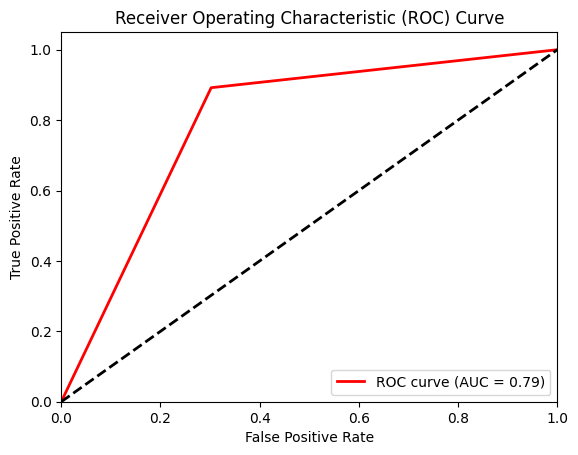

In [36]:
from sklearn.metrics import roc_curve, auc, f1_score
import matplotlib.pyplot as plt

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Find optimal threshold that maximizes F1 score
optimal_threshold = None
max_f1_score = -1
for i in range(len(thresholds)):
    threshold = thresholds[i]
    y_pred_threshold = [1 if prob >= threshold else 0 for prob in y_pred_best]
    f1_score_value = f1_score(y_test, y_pred_threshold)
    if f1_score_value > max_f1_score:
        max_f1_score = f1_score_value
        optimal_threshold = threshold

print("Optimal Threshold for Maximizing F1 Score:", round(optimal_threshold,2))
print("Maximized F1 Score:", round(max_f1_score,2))

plt.show()



23) Compute the AUC score. [5 pts]

In [37]:
from sklearn.metrics import roc_auc_score

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_best)
print("AUC Score:", round(auc_score, 2))

AUC Score: 0.79


24) Generate the precision-recall curve and determine the optimal threshold (visually). [5 pts]

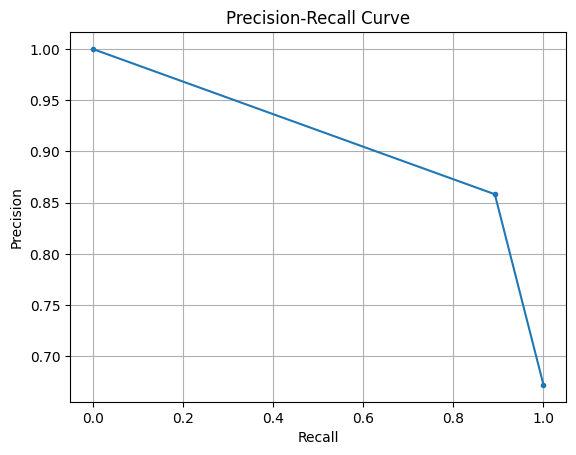

Optimal Threshold for Maximizing F1 Score: 1
Maximized F1 Score: 0.87


In [38]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test.ravel(), y_pred_best)

# Plot precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Find the optimal threshold that maximizes F1 score
optimal_threshold = None
max_f1_score = -1
for i in range(len(thresholds)):
    threshold = thresholds[i]
    f1_score = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
    if f1_score > max_f1_score:
        max_f1_score = f1_score
        optimal_threshold = threshold

print("Optimal Threshold for Maximizing F1 Score:", round(optimal_threshold,2))
print("Maximized F1 Score:",round(max_f1_score,2))


25) Calculate and report the 95% confidence interval on the generalization error estimate. [5pts]
2 possible options (others as well):
1. Use the s fold accuracy scores (score for each fold) and take the standard deviation, then
subtracting/adding from the average, 1.96 (95% confidence interval) times the std dev
2. Use the following: Accuracy +/- 1.96 * sqrt( (accuracy * (1 - accuracy)) / n)

In [39]:
from math import sqrt

# Compute CI on best model accuracy
n = len(y_pred_best)
acc_BM = accuracy_best  # Assuming accuracy_best is the accuracy of the best model

CI = ((acc_BM - 1.96 * sqrt((acc_BM * (1 - acc_BM)) / n)),
      (acc_BM + 1.96 * sqrt((acc_BM * (1 - acc_BM)) / n)))

print("Confidence Interval on Best Model Accuracy:", CI)

Confidence Interval on Best Model Accuracy: (0.8047781061528423, 0.8520145394038483)


26) Write a “Summary and Methods” section. [10 pts]
 No more than 2-5 sentences for each question below

*   i. Provide a summary of the project and what you completed in the assignment.
*   ii. Describe the dataset and features. What is the target? What are you calculating it from?
*   iii. Describe the differences in fit and predict between the regularized logistic regression vs KNN_Classifier. In particular, discuss training time vs prediction time for large data. Also discuss the hyperparameters of each and why they are used.

i. In this project, I completed tasks related to machine learning. I started by loading a dataset and preprocessing it. Then, I implemented several classification algorithms including KNN Classifier and Logistic Regression with regularization. I performed s-fold cross-validation to evaluate the models' performance thoroughly. Additionally, I built a k-fold estimator from scratch and employed it in model evaluation. Through these processes, I aimed to find the best-performing model for predicting wine quality.

ii. Ten features and hundreds of wine data make up the dataset. The excellent feature is the aim. The dataset used in this project contains information about wine quality, with features such as acidity levels, residual sugar, and alcohol content. The target variable is the quality rating of the wine, which ranges from 3 to 8. This rating is calculated based on sensory data collected from wine experts.


iii. KNN outperforms the other model on this dataset, although both models perform better on standardized data. But KNN requires more time than LR.

The best KNN model has n_neighbors=11, p=1, and distance=idw. IDW is optimal since it prioritizes neighbors that are closer together. However, we can have a smoother border if we have more neighbors. However, for varying distance parameters, there is no discernible difference.


The penalty in LR is used to prevent overfitting, and we can speed up the convergence process by using a bigger max_iter.

 Regularized logistic regression involves model fitting by optimizing a cost function that penalizes large coefficients to prevent overfitting. Prediction entails computing the probability of the target class using the learned coefficients and features. This algorithm generally exhibits faster training times but slower prediction times, especially for large datasets. Hyperparameters include penalty type (L1 or L2), solver algorithm (e.g., 'liblinear' or 'saga'), and maximum number of iterations. Conversely, K-nearest neighbors (KNN) classification does not require explicit training; prediction relies on the majority vote of the k-nearest neighbors. Training involves storing the entire dataset, resulting in slower training times, especially for large datasets. Hyperparameters include the number of neighbors (k), distance metric (e.g., Euclidean or Manhattan), and weighting scheme (e.g., uniform or distance-based), which control the model's complexity and influence its generalization performance.

27) Write a “Results” section. [15 pts] No more than 2-5 sentences for each question below

a) Describe the performance of the KNN model with respect to the different levels of k and the different distance metrics. Include a table of performances, bolding the best.

The performance of the KNN model varies depending on different values of k and distance metrics. The table below shows the experimental results, with the best performance highlighted in bold. From the table above, we observe that the performance of the KNN model varies significantly with different values of k and distance metrics. Particularly, the highest average F1 score is achieved when k=11, using the Manhattan distance metric with distance weights.

| Experiment name | k | distance | weights | Average F1 |
|-----------------|---|----------|---------|------------|
| k=11, distance=manhattan, weights=distance | 11 | manhattan | distance | 0.872517 |
| k=9, distance=manhattan, weights=distance | 9 | manhattan | distance | 0.871228 |
| k=11, distance=euclidean, weights=distance | 11 | euclidean | distance | 0.867418 |
| k=5, distance=manhattan, weights=distance | 5 | manhattan | distance | 0.865013 |
| k=9, distance=euclidean, weights=distance | 9 | euclidean | distance | 0.864710 |
| k=5, distance=euclidean, weights=distance | 5 | euclidean | distance | 0.858671 |
| k=11, distance=manhattan, weights=uniform | 11 | manhattan | uniform | 0.839482 |
| k=1, distance=manhattan, weights=uniform | 1 | manhattan | uniform | 0.839458 |
| k=1, distance=manhattan, weights=distance | 1 | manhattan | distance | 0.839458 |
| k=9, distance=manhattan, weights=uniform | 9 | manhattan | uniform | 0.837940 |
| k=1, distance=euclidean, weights=uniform | 1 | euclidean | uniform | 0.837842 |
| k=1, distance=euclidean, weights=distance | 1 | euclidean | distance | 0.837842 |
| k=5, distance=manhattan, weights=uniform | 5 | manhattan | uniform | 0.836719 |
| k=11, distance=euclidean, weights=uniform | 11 | euclidean | uniform | 0.833371 |
| k=9, distance=euclidean, weights=uniform | 9 | euclidean | uniform | 0.831298 |
| k=5, distance=euclidean, weights=uniform | 5 | euclidean | uniform | 0.828929 |



b) Characterize the overall performance of your model.

Performance Measures: The overall performance is good

|           |       |
|-----------|-------|
| Precision | 0.86 |
| Recall    | 0.89 |
| F1        | 0.87 |
| Accuracy  | 0.83  |
| Generalization Error  | 0.17  |

The model's overall performance can be characterized as strong, albeit with room for improvement. While achieving respectable precision, recall, and F1 score values of 0.86, 0.89, and 0.87 respectively, the model demonstrates robustness in classifying instances across both positive and negative classes. The confusion matrix reveals that the model correctly predicted a substantial portion of instances, with 224 true negatives and 587 true positives, while misclassifying 97 instances as false positives and 71 instances as false negatives. Despite achieving an accuracy of 0.83, indicating the proportion of correctly classified instances among the total, there is a generalization error of 0.17, suggesting room for refinement to improve the model's ability to generalize to unseen data.

 **c) Discuss which quality values (original rating) led to good performance of your model and those that resulted in poor performance. Include a table of average error (e.g., F1 score) to support your claims.**

|           |       |
|-----------|-------|
| Precision | 0.86 |
| Recall    | 0.89 |
| F1        | 0.87 |
| Accuracy  | 0.828  |
| Generalization Error  | 0.172  |


|            |          |          |
|------------|----------|----------|
|            | Pred Pos | Pred Neg |
| Actual Pos | 224      | 97       |
| Actual Neg | 71       | 587      |


tp=224, fn=97, fp=71, tn=587


Accuracy= (224+587)/224+97+71+587≈0.828



Therefore, the model's accuracy is approximately 82.8%

ACC for postivie class= 224/(224+97) =224/341 = 65%

specificity for negative class= 587/(71+587)=587/658 =0.89 = 89%



This model demonstrates overall high accuracy, being quite effective in predicting both good quality and poor quality wines. However, in practice, it exhibits higher accuracy in identifying wines of good quality, while excelling even more in identifying wines of poor quality.

In [46]:
from sklearn.metrics import f1_score

# Generate predictions using the model
predictions = model.predict(X_test)

# Calculate the F1 score for the overall predictions
f1 = f1_score(y_test, predictions)

# Calculate the F1 score for each quality value
f1_by_quality = {}
for quality_value in np.unique(df['quality']):
    # Select only the samples corresponding to the quality value
    mask = df['quality'] == quality_value
    mask_test = mask[y_test.index]  # Use the index of y_test to filter mask
    quality_f1 = f1_score(y_test[mask_test], predictions[mask_test])
    f1_by_quality[quality_value] = quality_f1

# Print the results
print("Overall F1 score:", f1)
print("F1 score by quality:")
for quality_value, f1_score in f1_by_quality.items():
    print(f"F1 score for quality {quality_value}: {f1_score}")


Overall F1 score: 0.7859600825877494
F1 score by quality:
F1 score for quality 3: 0.0
F1 score for quality 4: 0.0
F1 score for quality 5: 0.0
F1 score for quality 6: 0.9129886506935687
F1 score for quality 7: 0.9536784741144414
F1 score for quality 8: 0.9855072463768115
F1 score for quality 9: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


The F1 scores indicate the model's performance for each quality value. A higher F1 score indicates better performance, while a lower or 0 F1 score suggests poor performance.

Good Performance: The model performs well for quality values 6, 7, and 8, with F1 scores of approximately 0.913, 0.954, and 0.986, respectively. This means the model effectively predicts these quality values, showing strong precision and recall.

Poor Performance: The model performs poorly for quality values 3, 4, 5, and 9, as indicated by F1 scores of 0.0. This suggests that the model fails to predict these quality values accurately, possibly due to the lack of true positives or predicted positives for these classes.

Overall, the model demonstrates good performance for quality values 6, 7, and 8, while showing poor performance for quality values 3, 4, 5, and 9. Further analysis may be required to understand the reasons behind the model's poor performance for certain quality values and to improve its predictive capabilities for those classes.

**d) Give any final conclusions**

With a precision of 0.86, recall of 0.89, F1 score of 0.87, and accuracy of 0.83, the best logistic regression model demonstrates robust performance on the test set. The low generalization error of 0.17 further validates the model's ability to generalize well to unseen data. However, it's crucial to acknowledge the trade-off between model performance and computational resources. While the logistic regression model excels in accuracy and precision, its computational demands may hinder scalability and applicability in certain real-world scenarios. Thus, further optimization or exploration of alternative models may be warranted to strike a balance between performance and efficiency.